# Q10

Here, we will perform a multiple linear regression on the **Carseats** dataset with **sales** as the response and **Price**, **Urban** and **US** as predictors.

# Applying the fit over our model

First we import all the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

Now we load the **Carseats** dataset

In [2]:
#Loading the auto dataset using read_csv function of pandas library as auto.
Carseats = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv')
#Printing the data that we loaded
print(Carseats)

     Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0             1   9.50        138      73           11         276    120   
1             2  11.22        111      48           16         260     83   
2             3  10.06        113      35           10         269     80   
3             4   7.40        117     100            4         466     97   
4             5   4.15        141      64            3         340    128   
..          ...    ...        ...     ...          ...         ...    ...   
395         396  12.57        138     108           17         203    128   
396         397   6.14        139      23            3          37    120   
397         398   7.41        162      26           12         368    159   
398         399   5.94        100      79            7         284     95   
399         400   9.71        134      37            0          27    120   

    ShelveLoc  Age  Education Urban   US  
0         Bad   42         17   

Observing our dataset to notice any missing values in our data, etc.

In [3]:
Carseats.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
y, x = dmatrices('Sales ~ Price + Urban + US', data = Carseats)
lm = sm.OLS(y, x)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        23:43:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

p-value of Urban is very high, hence null hypothesis true for **Urban**, We fit another smaller model after dropping **Urban**

In [5]:
y2, x2 = dmatrices('Sales ~ Price + US', data = Carseats)
lm2 = sm.OLS(y2, x2)
res2 = lm2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        23:43:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

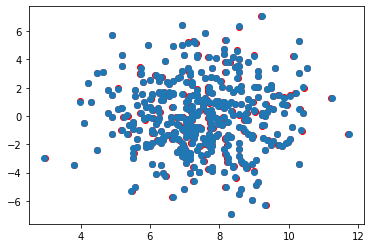

In [6]:
y_pred=res.fittedvalues
lm_residuals = res.resid
plt.scatter(y_pred, lm_residuals, color = 'red')
y2_pred=res2.fittedvalues
lm2_residuals = res2.resid
plt.scatter(y2_pred, lm2_residuals)

In [7]:
print(res2.conf_int(0.05))

[[11.7903202  14.27126531]
 [ 0.69151957  1.70776632]
 [-0.06475984 -0.04419543]]


In [8]:
model_norm_residuals =res.get_influence().resid_studentized_internal
model_leverage = res.get_influence().hat_matrix_diag

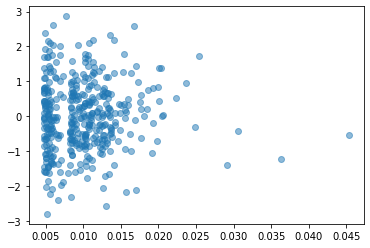

In [9]:
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)

In [ ]:
We can see that we have some high leverage points in the Residuals vs. Leverage plot